# MOM6 Momentum Budget

Link: https://mom6-analysiscookbook.readthedocs.io/en/latest/notebooks/Closing_momentum_budget.html#Budget-for-depth-av

`dudt = CAu + PFu + u_BT_accel + diffu + du_dt_visc +` residual due to remapping

Start with x direction as velocities bigger

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm
from xgcm import Grid

In [4]:
def open_IC():
    IC = xr.open_dataset('Initial_state.nc')
    return IC
def open_prog():
    prog = xr.open_dataset('prog.nc')
    return prog
def open_mom():
    mom = xr.open_dataset('mom.nc')
    return mom

In [5]:
IC = open_IC()
prog = open_prog()
mom = open_mom()

In [6]:
mom

<xarray.Dataset>
Dimensions:     (xq: 241, yh: 40, zl: 20, Time: 120, xh: 240, yq: 41)
Coordinates:
  * xq          (xq) float64 320.0 322.0 324.0 326.0 ... 794.0 796.0 798.0 800.0
  * yh          (yh) float64 1.0 3.0 5.0 7.0 9.0 ... 71.0 73.0 75.0 77.0 79.0
  * zl          (zl) float64 18.0 54.0 90.0 126.0 ... 594.0 630.0 666.0 702.0
  * Time        (Time) object 0001-01-01 01:00:00 ... 0001-01-06 00:00:00
  * xh          (xh) float64 321.0 323.0 325.0 327.0 ... 793.0 795.0 797.0 799.0
  * yq          (yq) float64 0.0 2.0 4.0 6.0 8.0 ... 72.0 74.0 76.0 78.0 80.0
Data variables: (12/16)
    dudt        (Time, zl, yh, xq) float64 ...
    dvdt        (Time, zl, yq, xh) float64 ...
    CAu         (Time, zl, yh, xq) float64 ...
    CAv         (Time, zl, yq, xh) float64 ...
    PFu         (Time, zl, yh, xq) float64 ...
    PFv         (Time, zl, yq, xh) float64 ...
    ...          ...
    du_dt_visc  (Time, zl, yh, xq) float64 ...
    dv_dt_visc  (Time, zl, yq, xh) float64 ...
    gKEu        (Time, zl, yh, xq) float64 ...
    gKEv        (Time, zl, yq, xh) float64 ...
    rvxu        (Time, zl, yq, xh) float64 ...
    rvxv        (Time, zl, yh, xq) float64 ...
Attributes:
    filename:   mom.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

Let us first plot the x momentum balance in bottom layer at time t = 1 h

Text(0.5, 0.98, 'Time = 1 hour, Bottom Layer')

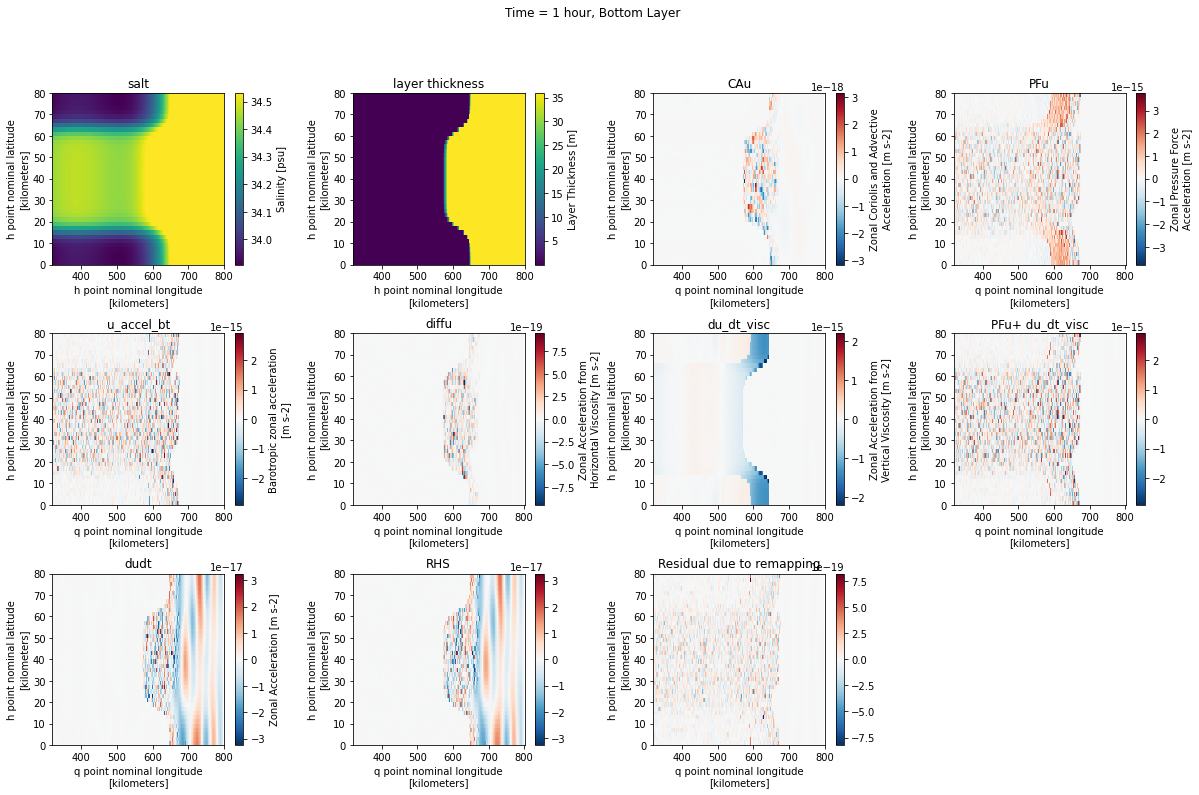

In [7]:
tt = 0
zz = -1
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')


mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 1 hour, Bottom Layer')

Text(0.5, 0.98, 'Time = 5 days, Bottom Layer')

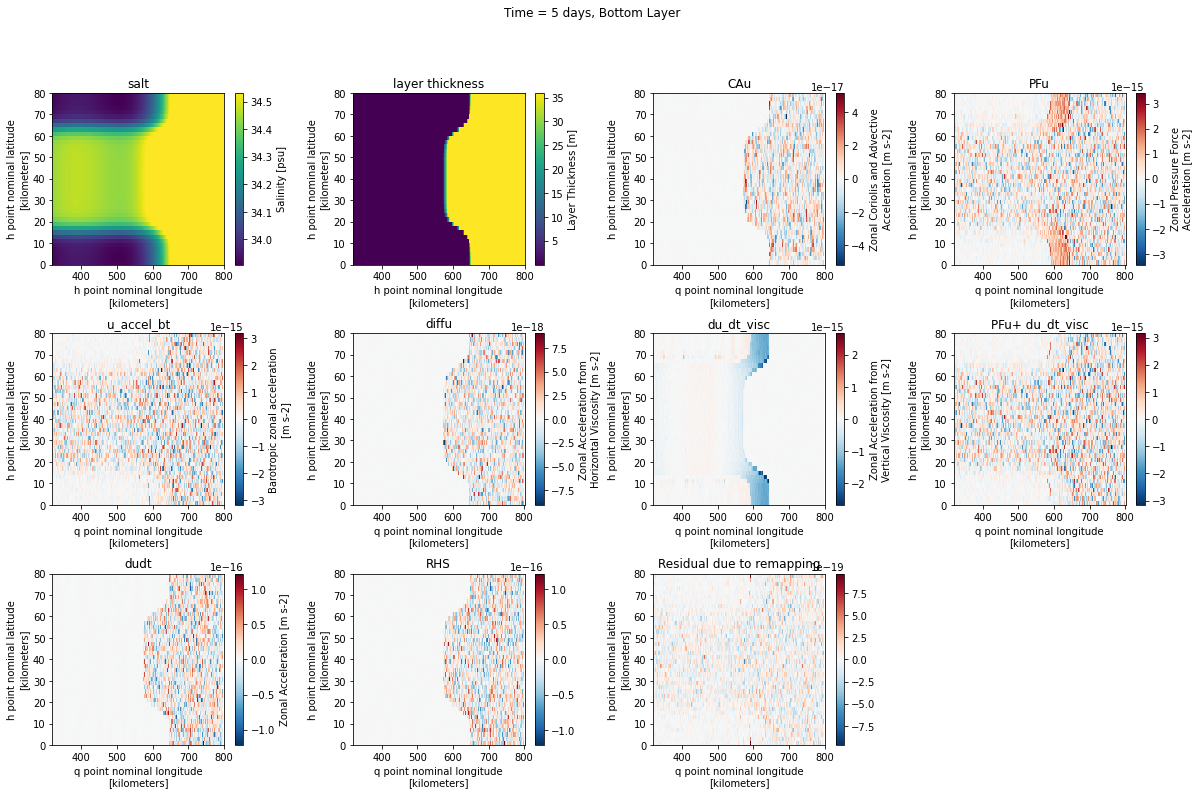

In [8]:
tt = -1
zz = -1
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')

mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

#axes[1,3].axis('off')
axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 5 days, Bottom Layer')

In [9]:
print(np.abs(prog.u.isel(Time = -1)).argmax(['zl','yh','xq']))

print('umax = '+str(np.abs(prog.u.isel(Time = -1)).max(['zl','yh','xq']).values))

{'zl': <xarray.DataArray 'u' ()>
array(2)
Coordinates:
    Time     object 0001-01-06 00:00:00, 'yh': <xarray.DataArray 'u' ()>
array(35)
Coordinates:
    Time     object 0001-01-06 00:00:00, 'xq': <xarray.DataArray 'u' ()>
array(92)
Coordinates:
    Time     object 0001-01-06 00:00:00}
umax = 4.691835729526496e-12
